In [2]:
# All imports and styles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from matplotlib import style 
from sklearn.cluster import KMeans 

style.use("fivethirtyeight") 

In [3]:
#Importing and cleaning Star Wars data
Ratings = pd.read_csv('C:/Users/Raymond Luu/Downloads/Coding/Datasets/Star Wars Ratings.csv')
Ratings.drop('Timestamp', axis = 1, inplace=True)

#Keep only rows with 9 unique ratings
Ratings['num_uniq'] = [len(set(v[pd.notna(v)].tolist())) for v in Ratings.values]
Ratings = Ratings[Ratings.num_uniq == 9]
Ratings.drop('num_uniq', axis = 1, inplace=True)

In [4]:
#Some light exploratory data analysis 
Ratings.describe()

#On average the episode ranks seems to go 5 > 4 > 8 > 6 > 7 > 3 > 9 > 1 > 2
#Episodes 8, 3, and 9 all seem to be quite controversial

,Episode 1,Episode 2,Episode 3,Episode 4,Episode 5,Episode 6,Episode 7,Episode 8,Episode 9
count,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,7.809917,8.070248,5.309917,3.35124,2.380165,4.285124,4.805785,3.557851,5.429752
std,1.473495,1.510414,2.140070,1.60283,1.992751,1.661533,1.621781,2.375262,1.925270
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.000000,8.000000,4.000000,2.00000,1.000000,3.000000,4.000000,2.000000,4.000000
50%,8.000000,9.000000,6.000000,3.00000,2.000000,4.000000,5.000000,3.000000,6.000000
75%,9.000000,9.000000,7.000000,4.00000,3.000000,5.000000,6.000000,5.000000,7.000000
max,9.000000,9.000000,9.000000,8.00000,9.000000,9.000000,9.000000,9.000000,9.000000


In [172]:
#Let's look at the correlation matrix to see if we have any trends to look out for
Ratings.corr()

#Some things of note are that since this is ranking data, it would be natural to mostly light negative correlations
#Episode 1 and 2 are correlated, which gives numerical credence to the often held opinion that they are the worst
#Naturally, Episode 5 is negatively correlated with Episodes 1 and especially 2
#More interesting of note is that there appears to be a negative correlation between Episodes 3 and 8

,Episode 1,Episode 2,Episode 3,Episode 4,Episode 5,Episode 6,Episode 7,Episode 8,Episode 9
Episode 1,1.000000,0.487039,-0.023348,-0.038376,-0.409118,-0.052344,-0.104067,-0.295606,-0.168544
Episode 2,0.487039,1.000000,0.104917,-0.255330,-0.561722,-0.102258,-0.048613,-0.273512,-0.013278
Episode 3,-0.023348,0.104917,1.000000,-0.343962,-0.173688,-0.056461,-0.285056,-0.368014,0.033001
Episode 4,-0.038376,-0.255330,-0.343962,1.000000,0.238626,-0.012832,-0.071020,-0.095276,-0.279050
Episode 5,-0.409118,-0.561722,-0.173688,0.238626,1.000000,0.067383,-0.263373,0.154005,-0.313143
Episode 6,-0.052344,-0.102258,-0.056461,-0.012832,0.067383,1.000000,-0.290417,-0.289648,-0.137045
Episode 7,-0.104067,-0.048613,-0.285056,-0.071020,-0.263373,-0.290417,1.000000,0.050862,0.111893
Episode 8,-0.295606,-0.273512,-0.368014,-0.095276,0.154005,-0.289648,0.050862,1.000000,-0.256798
Episode 9,-0.168544,-0.013278,0.033001,-0.279050,-0.313143,-0.137045,0.111893,-0.256798,1.000000


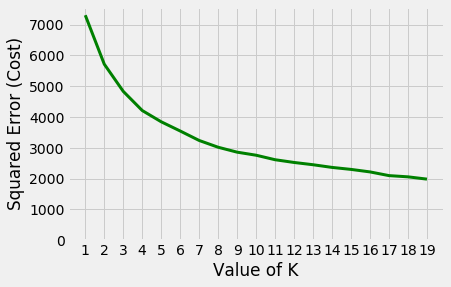

In [5]:
#Create elbow plot to choose K value 
cost = [] 
for i in range(1, 20): 
    KM = KMeans(n_clusters = i, max_iter = 1000) 
    KM.fit(Ratings) 
    cost.append(KM.inertia_)     
    
# plot the cost against K values 
plt.plot(range(1, 20), cost, color ='g', linewidth ='3') 
plt.xticks(np.arange(1, 20, 1)) 
plt.yticks(np.arange(0, 8000, 1000)) 
plt.xlabel("Value of K") 
plt.ylabel("Squared Error (Cost)") 
plt.show() 

In [186]:
#4 seems to be a reasonable inflection point though there does not seem to be a particularly clear dropoff
#We will now examine the properties of these 4 clusters

KM4 = KMeans(n_clusters = 4, max_iter = 1000) 
KM4.fit(Ratings)

Clusters_desc = pd.DataFrame(KM4.cluster_centers_)
Clusters_desc.columns = Ratings.columns
Clusters_desc['N'] = np.bincount(KM4.labels_)

#The 4 groups that K Means have found vary in size greatly. 
#Group 0 is the largest group and swaps Episode 4 and 8 in rankings compared to the dataset average
#Group 1 comprises of 32 people who love Episode 8 and even consider it their favorite
#Group 2 seems to represent the group who hated Episode 8 and seem to quite like Episode 3. 
#Group 3 consists of solely 14 people, seemingly united by their distaste for the otherwise loved Episode 5
#Group 3 also seems to enjoy Episodes 1 and 2 much more than the rest of the data. May just be contrarians or trolls
Clusters_desc

,Episode 1,Episode 2,Episode 3,Episode 4,Episode 5,Episode 6,Episode 7,Episode 8,Episode 9,N
0,8.028369,8.468085,6.198582,2.737589,1.617021,4.475177,4.851064,2.361702,6.262411,141
1,8.531250,8.187500,4.281250,5.687500,3.593750,5.062500,4.312500,1.906250,3.437500,32
2,7.745455,8.090909,3.581818,3.454545,2.163636,3.000000,5.345455,6.909091,4.709091,55
3,4.214286,3.714286,5.500000,3.785714,8.142857,5.642857,3.357143,6.214286,4.428571,14


In [188]:
#I am a little concerned about the uneven-ness of the cluster groups
#I do find it interesting that the algorithm could separate out a group of perhaps deliberate contrarians
#I am also curious if results would change drastically with hierarchal clustering with a distance measure that weights the differences between the higher ranks more than in the lower ones such as Canberra or Clark distances. 